In [13]:
#libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

In [14]:
data = np.loadtxt('hw7_q4.csv', delimiter=",", dtype=float)
x = data[:,:2]
y = data[:,2]
n = len(data)

In [15]:
#define objective functions, confusion matrix functions
X = np.column_stack((np.ones(n), x))
def crossentropy_loss(w):
    loss = y.T @ np.log(1 + np.exp(-w @ X.T)) + (1 - y).T @ np.log(1 + np.exp(w @ X.T))
    return loss
def MSE_loss(w):
    loss = np.linalg.norm(y - X @ w)**2
    return loss
def cmval(X, w, y, c, n):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(n):
        if ((X @ w)[i] < c):
            if (y[i] == 0):
                tn+=1
            else:
                fn+=1
        else:
            if (y[i] == 1):
                tp+=1
            else:
                fp+=1
    return tp, fp, tn, fn

In [16]:
#minimize cross entropy loss 
res1 = minimize(crossentropy_loss, [0,0,0], method='BFGS', options={'disp': True})
w1 = res1.x
cmval(X,w1,y,0,n)

Optimization terminated successfully.
         Current function value: 44.674623
         Iterations: 8
         Function evaluations: 44
         Gradient evaluations: 11


(45, 9, 41, 5)

In [17]:
#minimize MSE loss
res2 = minimize(MSE_loss, [0,0,0], method='BFGS', options={'disp': True})
w2 = res2.x
cmval(X,w2,y,0,n)

Optimization terminated successfully.
         Current function value: 15.073670
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


(50, 45, 5, 0)

In [18]:
nv = 100
xval = np.linspace(-2,2,nv)
x1,x2 = np.meshgrid(xval,xval)

In [19]:
cel = np.zeros((nv,nv))
for i in range(nv):
    for j in range(nv):
        cel[i,j] = crossentropy_loss(np.stack([-0.3140706, x1[i,j], x2[i,j]]))
msel = np.zeros((nv,nv))
for i in range(nv):
    for j in range(nv):
        msel[i,j] = MSE_loss(np.stack([0.46021609, x1[i,j], x2[i,j]]))

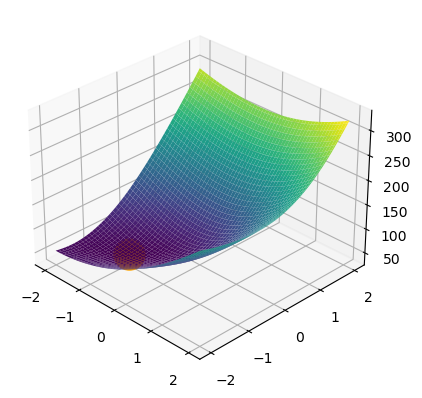

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, cel, cmap=cm.viridis,linewidth=0)
ax.scatter(w1[1],w1[2],crossentropy_loss(w1),s=500, color="orange")
ax.view_init(30, -45)

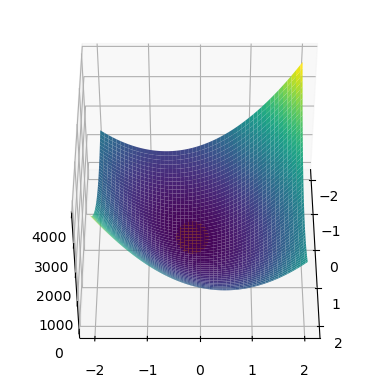

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, msel, cmap=cm.viridis,linewidth=0)
ax.scatter(w2[1],w2[2],MSE_loss(w2),s=500, color="orange")
ax.view_init(45, 0)

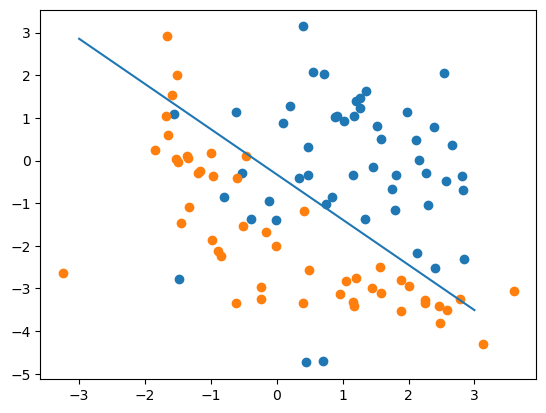

In [11]:
#plot stuff
plt.scatter(x[0:50,0], x[0:50,1])
plt.scatter(x[50:100,0], x[50:100,1])
xvalues = np.linspace(-3,3,100)
plt.plot(xvalues, -(w1[0] + w1[1] * xvalues) / w1[2])

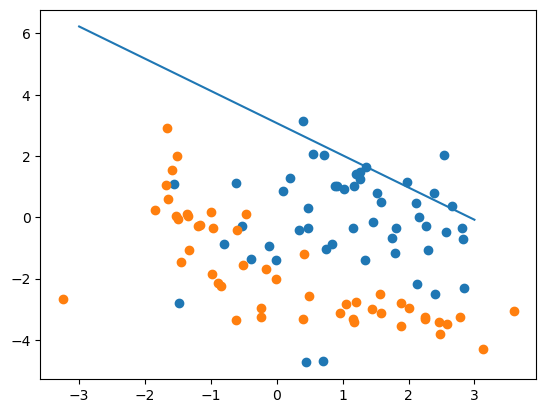

In [33]:
#plot stuff
plt.scatter(x[0:50,0], x[0:50,1])
plt.scatter(x[50:100,0], x[50:100,1])
xvalues = np.linspace(-3,3,100)
plt.plot(xvalues, -(w2[0] + w2[1] * xvalues) / w2[2])

In [35]:
ximbalance = x[0:60]
yimbalance = y[0:60]

Ximbalance = np.column_stack([np.ones(60), ximbalance])
def crossentropy_loss(w):
    loss = yimbalance.T @ np.log(1 + np.exp(-w @ Ximbalance.T)) + (1 - yimbalance).T @ np.log(1 + np.exp(w @ Ximbalance.T))
    return loss
def MSE_loss(w):
    loss = np.linalg.norm(yimbalance - Ximbalance @ w)**2
    return loss

#minimize cross entropy loss 
res1imbalance = minimize(crossentropy_loss, [0,0,0], method='BFGS', options={'disp': True})
w1imbalance = res1imbalance.x

#minimize MSE loss
res2imbalance = minimize(MSE_loss, [0,0,0], method='BFGS', options={'disp': True})
w2imbalance = res2imbalance.x

Optimization terminated successfully.
         Current function value: 10.926189
         Iterations: 18
         Function evaluations: 84
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 4.925086
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


In [39]:
w1imbalance

array([-2.56274515, -2.83040213, -0.15156627])

In [36]:
cmval(Ximbalance,w1imbalance,yimbalance,0,60)

(8, 2, 48, 2)

In [37]:
cmval(Ximbalance,w2imbalance,yimbalance,0,60)

(10, 33, 17, 0)

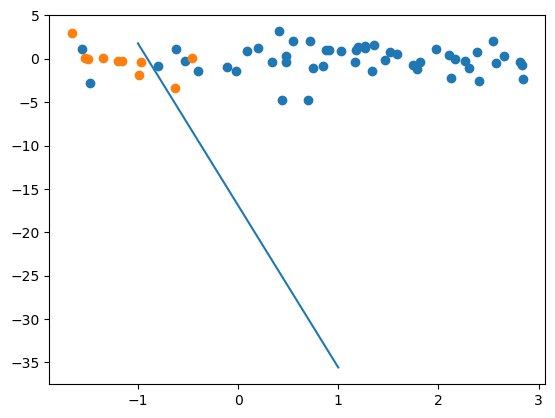

In [41]:
#plot stuff
plt.scatter(x[0:50,0], x[0:50,1])
plt.scatter(x[50:60,0], x[50:60,1])
xvalues = np.linspace(-3,3,100)
plt.plot(xvalues, -(w1imbalance[0] + w1imbalance[1] * xvalues) / w1imbalance[2])

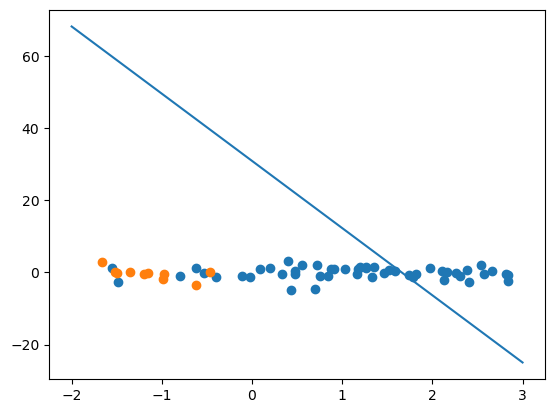

In [44]:
#plot stuff
plt.scatter(x[0:50,0], x[0:50,1])
plt.scatter(x[50:60,0], x[50:60,1])
xvalues = np.linspace(-2,3,100)
plt.plot(xvalues, -(w2imbalance[0] + w2imbalance[1] * xvalues) / w2imbalance[2])

In [54]:
np.shape(X @ w1)

(100,)

In [56]:
w1 @ X.T

array([-2.83110358, -3.50365756, -0.39517576, -2.18302549, -0.34750802,
       -2.34945011, -3.02665827, -2.25999495,  3.79332292, -0.47042356,
        1.40097018, -2.53285218, -1.84583766, -0.34642735,  1.32833312,
       -1.6493695 , -0.35231641, -3.26194641, -2.53879727, -1.02498191,
       -2.47969136, -0.77266376,  0.21684269, -1.74491353, -2.79518118,
        0.70765182, -2.87179571,  3.49620021, -1.43765899, -1.09716979,
       -2.98481422, -1.17943722, -1.66357488, -1.23890011, -3.74735443,
        1.04589966,  0.50518113, -2.63853978, -2.23834479, -2.41035499,
       -2.88530951, -0.99663255, -0.27076576, -0.09601928, -4.86776292,
       -2.91974889,  3.87644556, -3.42442702, -3.37288195, -2.5113224 ,
        1.01100497,  1.20699445,  3.54835698,  1.02970942,  1.18892201,
       -1.42255825,  1.25679495,  0.06396066,  2.47895413,  1.09244894,
        0.78909494,  0.69178532,  0.3942292 ,  2.64808848,  0.96150148,
        0.54427082,  2.08374691,  1.33138347, -0.68710061, -0.17